# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

#### Librerias externas

In [3]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

#### Información de nuestra base de datos

* PassengerId: Identificación única para cada pasajero. 

* HomePlanet: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

* CryoSleep: Indica si el pasajero eligió ponerse en modo suspendido durante la duración del viaje.Los pasajeros en criosueño están confinados en sus cabinas.

* Cabina : El número de cabina donde se hospeda el pasajero. Toma la forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor.

* Destino: El planeta al que desembarcará el pasajero.

* Edad - La edad del pasajero.

* VIP: si el pasajero ha pagado por un servicio VIP especial durante el viaje.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.

* Nombre - El nombre y apellido del pasajero.

* Transportado: Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

In [4]:
####Pablo
#train_data = pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\AprendizajeSupervisado-master\Práctico\train.csv',index_col=0)
#test_data = pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\AprendizajeSupervisado-master\Práctico\test.csv',index_col=0)

In [5]:
####MELANI
#train_data = pd.read_csv(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\Práctico\train.csv',index_col=0)
#test_data = pd.read_csv(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\Práctico\test.csv',index_col=0)

In [6]:
train_data = pd.read_csv('train.csv',index_col=0)
len(train_data)

7823

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 3430 to 7624
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7644 non-null   object 
 1   CryoSleep     7627 non-null   object 
 2   Cabin         7639 non-null   object 
 3   Destination   7663 non-null   object 
 4   Age           7661 non-null   float64
 5   VIP           7639 non-null   object 
 6   RoomService   7669 non-null   float64
 7   FoodCourt     7668 non-null   float64
 8   ShoppingMall  7635 non-null   float64
 9   Spa           7665 non-null   float64
 10  VRDeck        7654 non-null   float64
 11  Name          7639 non-null   object 
 12  Transported   7823 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 855.6+ KB


In [8]:
train_data['VIP'].value_counts()

False    7456
True      183
Name: VIP, dtype: int64

In [9]:
print(train_data)

            HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
PassengerId                                                            
3430            Europa     False   C/123/P  TRAPPIST-1e  57.0  False   
669               Mars      True   F/126/S          NaN  18.0  False   
8430            Europa      True   B/343/S  TRAPPIST-1e  33.0    NaN   
6463             Earth     False  F/1420/P  TRAPPIST-1e  43.0  False   
85               Earth     False     G/9/P  TRAPPIST-1e  19.0  False   
...                ...       ...       ...          ...   ...    ...   
6528              Mars     False  F/1319/S  TRAPPIST-1e  12.0    NaN   
2693             Earth     False   G/459/S  TRAPPIST-1e  44.0  False   
8076              Mars      True  F/1772/P  TRAPPIST-1e  55.0  False   
3829             Earth     False   E/253/P  TRAPPIST-1e  15.0  False   
7624            Europa      True   B/270/P  55 Cancri e  45.0  False   

             RoomService  FoodCourt  ShoppingMall    Spa  VRDec

Resumen:

* Cómo podemos observar nuestros datos train , poseen 7823 filas y 14 columnas
* Posee valores nulos 

In [10]:
train_data.isna().sum()

HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [11]:
train_data.HomePlanet.value_counts()

Earth     4114
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [12]:
train_data.Destination.value_counts()

TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
Name: Destination, dtype: int64

<AxesSubplot:>

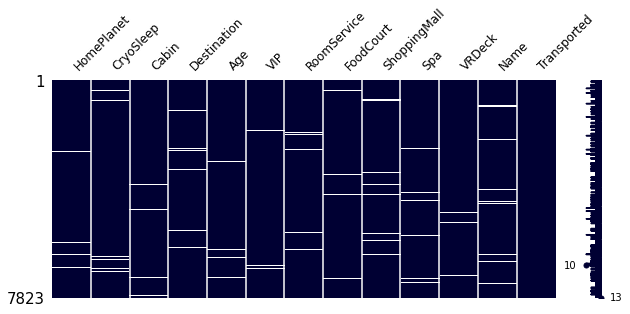

In [13]:
msno.matrix(train_data,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [14]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


<AxesSubplot:xlabel='Transported', ylabel='count'>

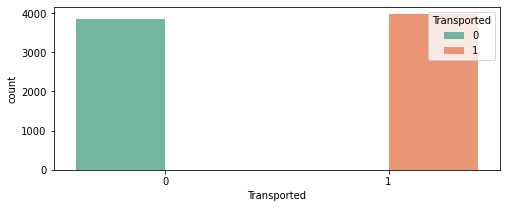

In [15]:
plt.figure(figsize=(8,3))
#plt.subplot(1,2,1)
sns.countplot(x=train_data['Transported'],hue=train_data['Transported'],palette='Set2')
#palette=('red','green')

In [16]:
categorical_columns=[]
numerical_columns=[]
for i in train_data.columns:
    if train_data[i].dtype=='object':
        categorical_columns.append(i)
    elif train_data[i].dtype in ['int64','float64']:
        numerical_columns.append(i)

print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


<AxesSubplot:>

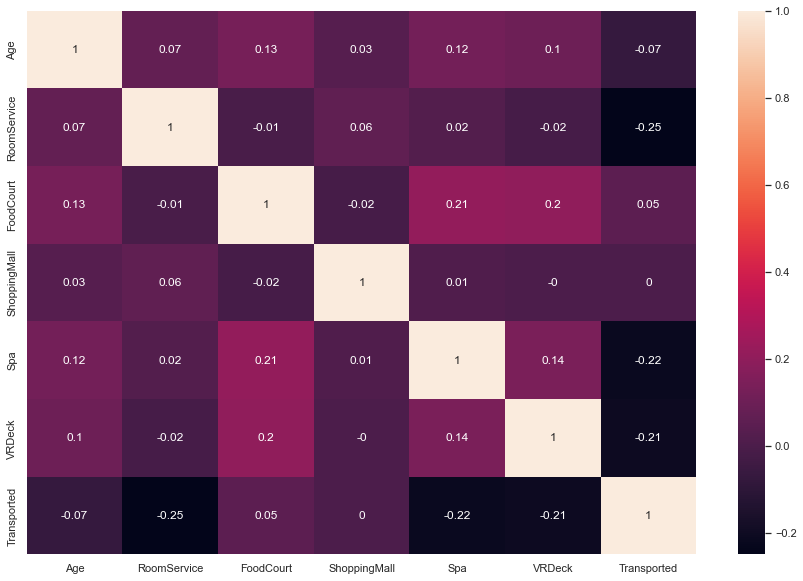

In [17]:
sns.set(rc = {'figure.figsize':(15,10)})
correlation_matrix=train_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

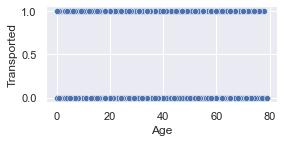

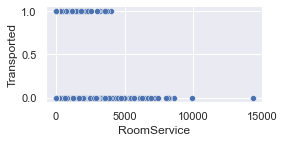

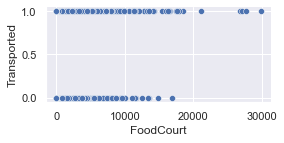

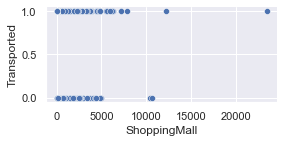

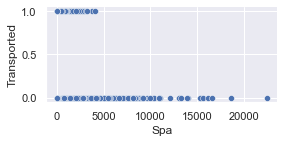

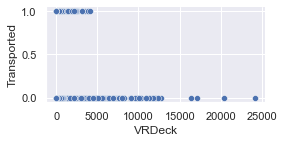

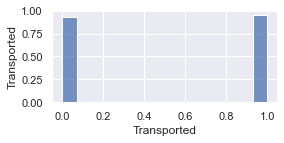

In [18]:
for var in numerical_columns:
 sns.pairplot(data=train_data, y_vars=["Transported"],
  x_vars=[var],
 aspect=2, height=2)

In [19]:
# Matriz usando ambas variables 
pd.crosstab(train_data["HomePlanet"], train_data["Transported"], margins=True, margins_name="Total")
#pd.crosstab(train_data["Age"], train_data["Transported"], margins=True, margins_name="Total", normalize="index")

Transported,0,1,Total
HomePlanet,,,
Earth,2352,1762,4114
Europa,653,1282,1935
Mars,768,827,1595
Total,3773,3871,7644


In [20]:
pd.crosstab(train_data["VIP"], train_data["Transported"], margins=True, margins_name="Total")

Transported,0,1,Total
VIP,,,
False,3653,3803,7456
True,116,67,183
Total,3769,3870,7639


In [21]:
#pd.crosstab(train_data["VIP"], train_data["Transported"], margins=True, margins_name="Total")
#pd.crosstab(train_data["CryoSleep"], train_data["Transported"], margins=True, margins_name="Total")
#pd.crosstab(train_data["Destination"], train_data["Transported"], margins=True, margins_name="Total")


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

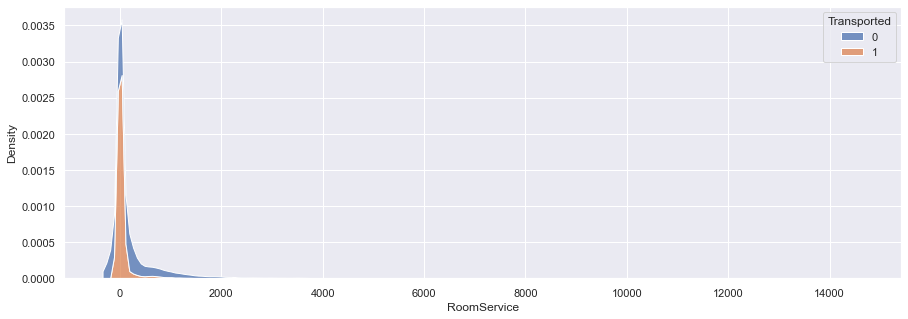

In [22]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#Se grafican las densidades de las variables
#sns.kdeplot(train_data['RoomService'])
sns.kdeplot(data=train_data,x=train_data['RoomService'],hue=train_data['Transported'], multiple="stack")

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

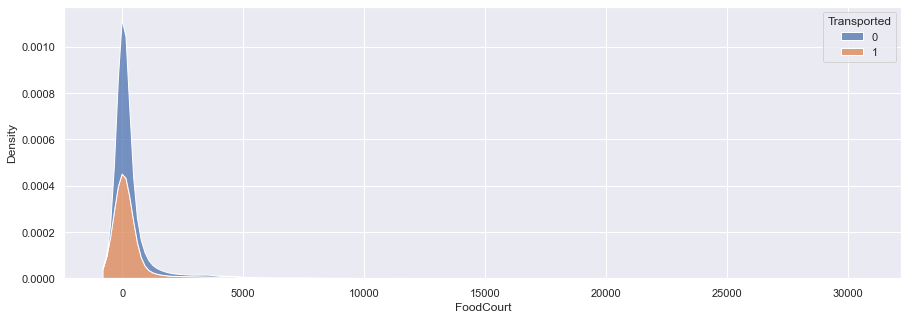

In [23]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
#sns.kdeplot(train_data['FoodCourt'])
sns.kdeplot(data=train_data,x=train_data['FoodCourt'],hue=train_data['Transported'],multiple="stack")

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

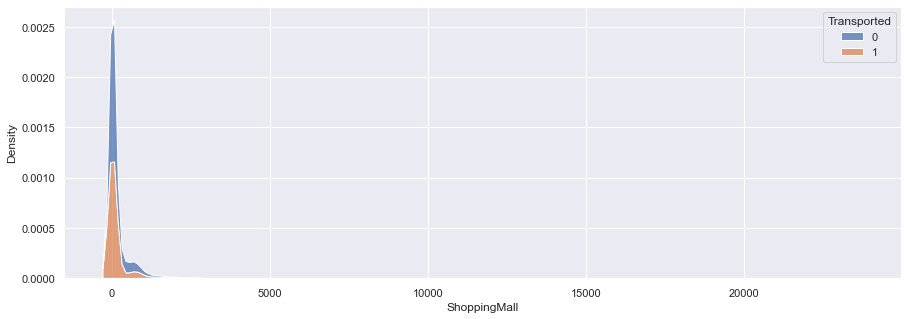

In [24]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
#sns.kdeplot(train_data['ShoppingMall'])
sns.kdeplot(data=train_data,x=train_data['ShoppingMall'],hue=train_data['Transported'],multiple="stack")

<AxesSubplot:xlabel='Spa', ylabel='Density'>

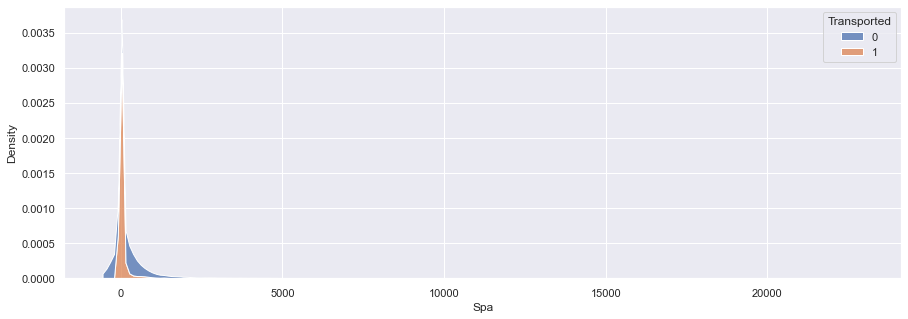

In [25]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
#sns.kdeplot(train_data['Spa'])
sns.kdeplot(data=train_data,x=train_data['Spa'],hue=train_data['Transported'],multiple="stack")

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

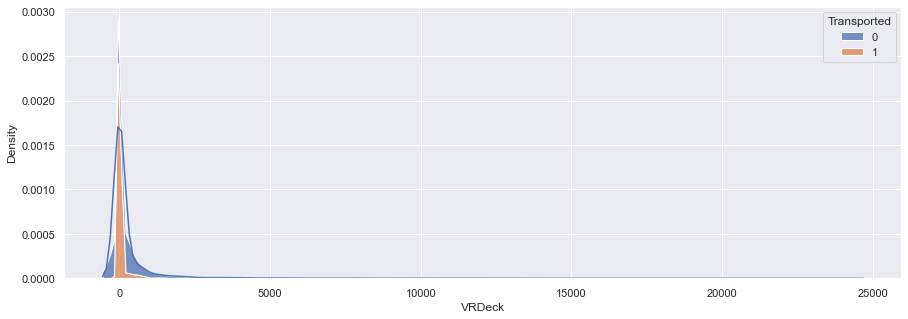

In [26]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
sns.kdeplot(train_data['VRDeck'])
sns.kdeplot(data=train_data,x=train_data['VRDeck'],hue=train_data['Transported'],multiple="stack")

<AxesSubplot:xlabel='Age', ylabel='Density'>

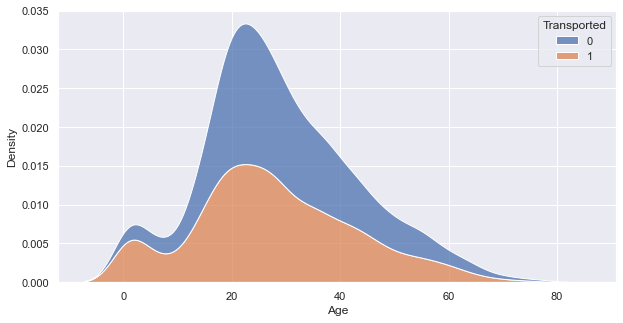

In [27]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
#sns.kdeplot(train_data['Age'])
sns.kdeplot(data=train_data,x=train_data['Age'],hue=train_data['Transported'],multiple="stack")

(array([6.74e+03, 4.37e+02, 1.62e+02, 9.30e+01, 3.80e+01, 3.50e+01,
        3.60e+01, 1.70e+01, 1.90e+01, 1.60e+01, 8.00e+00, 8.00e+00,
        8.00e+00, 9.00e+00, 2.00e+00, 3.00e+00, 6.00e+00, 1.00e+00,
        5.00e+00, 3.00e+00, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([    0.   ,   603.325,  1206.65 ,  1809.975,  2413.3  ,  3016.625,
         3619.95 ,  4223.275,  4826.6  ,  5429.925,  6033.25 ,  6636.575,
         7239.9  ,  7843.225,  8446.55 ,  9049.875,  9653.2  , 10256.525,
        10859.85 , 11463.175, 12066.5  , 12669.825, 13273.15 , 13876.475,
        14479.8  , 15083.125, 15686.45 , 16289.775, 16893.1  , 17496.425,
        18099.75 , 18703.075, 19306.4  , 19909.725, 20513.05 , 21116.375,
        21719.7  , 22323.025, 22926.35 , 23529.675, 24133.   ]),
 <BarContainer object of 40 artis

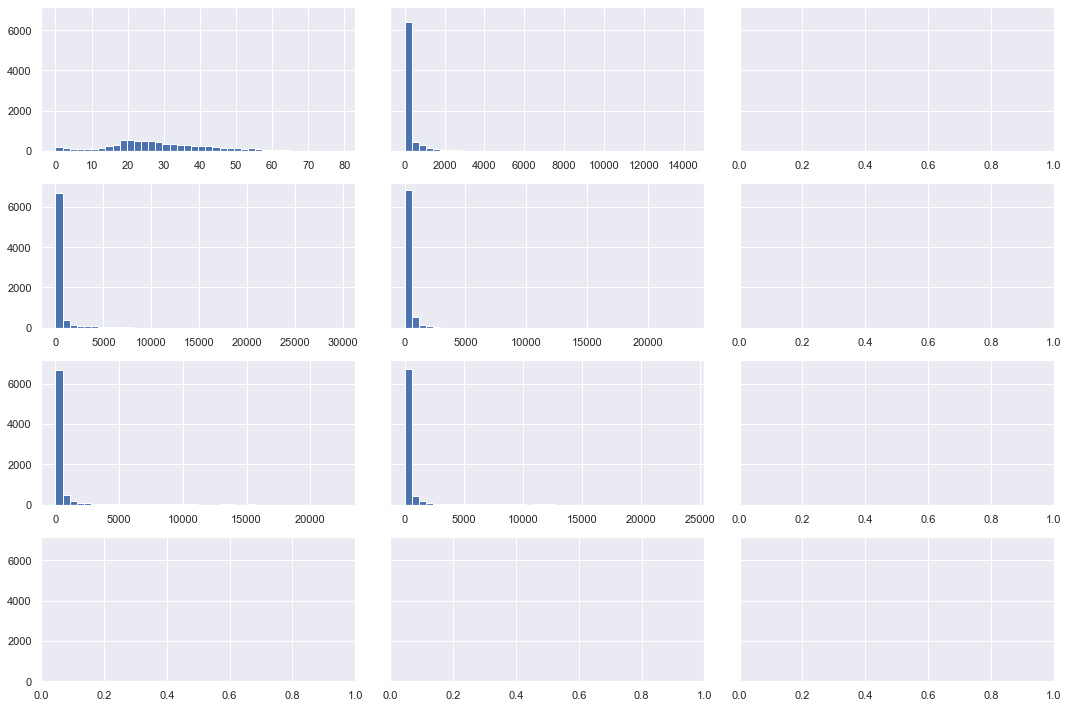

In [28]:
fig, axs = plt.subplots(4, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(train_data['Age'], bins=40)
axs[0,1].hist(train_data['RoomService'], bins=40)
axs[1,0].hist(train_data['FoodCourt'], bins=40)
axs[1,1].hist(train_data['ShoppingMall'], bins=40)
axs[2,0].hist(train_data['Spa'], bins=40)
axs[2,1].hist(train_data['VRDeck'], bins=40)


In [29]:
hist(train_data['Transported'], bins=40)

In [30]:
#No hay un desbalanceo desmedido en los datos train de la variable objetivo

#### DATOS TRAIN

<AxesSubplot:>

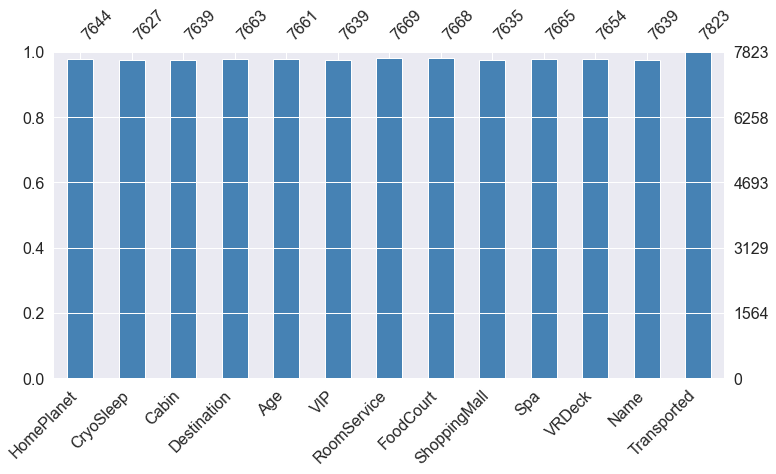

In [31]:
msno.bar(train_data,figsize=(12,6),color='steelblue')

In [32]:
categorical_columns=[]
numerical_columns=[]
for i in train_data.columns:
    if train_data[i].dtype=='object':
        categorical_columns.append(i)
    elif train_data[i].dtype in ['int64','float64']:
        numerical_columns.append(i)

print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


for columna in categorical_columns[:(len(categorical_columns))]:
  fig, ax1 = plt.subplots()
  chart=sns.countplot(y = columna,
                data = train_data,
                palette = 'Set3')
  fig.set_size_inches(10, 5)
  fig.tight_layout()

            HomePlanet CryoSleep     Cabin  Destination       Age    VIP  \
PassengerId                                                                
3430            Europa     False   C/123/P  TRAPPIST-1e  0.721519  False   
669               Mars      True   F/126/S          NaN  0.227848  False   
8430            Europa      True   B/343/S  TRAPPIST-1e  0.417722    NaN   
6463             Earth     False  F/1420/P  TRAPPIST-1e  0.544304  False   
85               Earth     False     G/9/P  TRAPPIST-1e  0.240506  False   
...                ...       ...       ...          ...       ...    ...   
6528              Mars     False  F/1319/S  TRAPPIST-1e  0.151899    NaN   
2693             Earth     False   G/459/S  TRAPPIST-1e  0.556962  False   
8076              Mars      True  F/1772/P  TRAPPIST-1e  0.696203  False   
3829             Earth     False   E/253/P  TRAPPIST-1e  0.189873  False   
7624            Europa      True   B/270/P  55 Cancri e  0.569620  False   

           

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


7823
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 3430 to 7624
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7644 non-null   object 
 1   CryoSleep     7627 non-null   object 
 2   Cabin         7639 non-null   object 
 3   Destination   7663 non-null   object 
 4   Age           7823 non-null   float64
 5   VIP           7639 non-null   object 
 6   RoomService   7823 non-null   float64
 7   FoodCourt     7823 non-null   float64
 8   ShoppingMall  7823 non-null   float64
 9   Spa           7823 non-null   float64
 10  VRDeck        7823 non-null   float64
 11  Name          7639 non-null   object 
 12  Transported   7823 non-null   float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


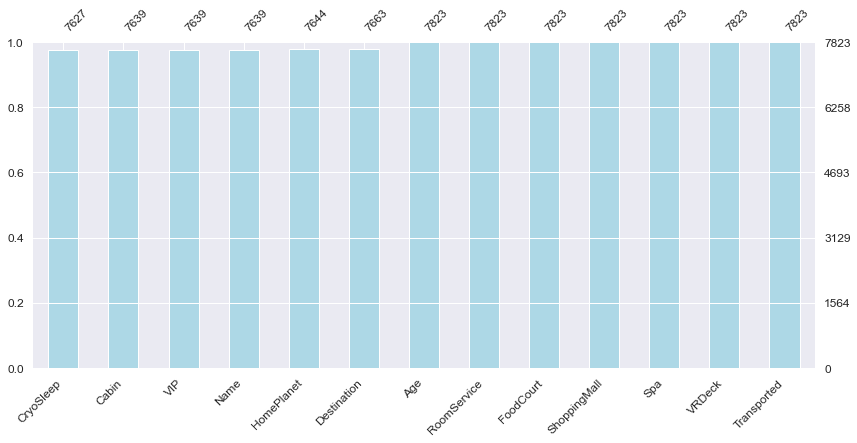

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

##Normalizamos numéricas
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
#################################

####imputamos Nans de numéricas
train_2 = train_data.copy()
print(train_2)
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
train_2[numerical_columns] = kn_imputer.fit_transform(train_2[numerical_columns])
print(len(train_2))
###########################
msno.bar(train_2,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')
########################
train_2.info()

In [34]:
train_2.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000
mean,0.365519,0.015769,0.015192,0.007292,0.013540,0.012136,0.506711
std,0.181502,0.047132,0.053975,0.025210,0.050139,0.044883,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.481013,0.003420,0.002532,0.001320,0.002722,0.002072,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
###Se imputan las variables categoricas para VIP y CryoSleep
# import modules
from numpy import isnan
from sklearn.impute import SimpleImputer
 
# defining the imputer
imputer = SimpleImputer(strategy='most_frequent')

label_columns=['VIP','CryoSleep','HomePlanet','Destination']
 
# transform the dataset
train_2[label_columns] = imputer.fit_transform(train_2[label_columns])
   
# count the number of NaN values in each column
train_2.info()
train_2['HomePlanet'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 3430 to 7624
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7823 non-null   object 
 1   CryoSleep     7823 non-null   bool   
 2   Cabin         7639 non-null   object 
 3   Destination   7823 non-null   object 
 4   Age           7823 non-null   float64
 5   VIP           7823 non-null   bool   
 6   RoomService   7823 non-null   float64
 7   FoodCourt     7823 non-null   float64
 8   ShoppingMall  7823 non-null   float64
 9   Spa           7823 non-null   float64
 10  VRDeck        7823 non-null   float64
 11  Name          7639 non-null   object 
 12  Transported   7823 non-null   float64
dtypes: bool(2), float64(7), object(4)
memory usage: 1006.7+ KB


Earth     4293
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [36]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in train_2:
    if train_2[var].dtype == 'object':
        unique_cases = train_2[var].unique()
        if len(unique_cases) > 5:
            print(var)
            train_2.drop(var, inplace=True, axis=1)

print(train_2.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    train_2[col] = train_2[col].astype(str)
    train_2[col] = LabelEncoder().fit_transform(train_2[col])

train_2_names = train_2.columns
train_2
#X = StandardScaler().fit_transform(X)
#X = pd.DataFrame(X, columns=x_names)
#X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
3430,1,0,2,0.721519,0,0.000000,0.129440,0.000553,0.008702,0.160527,0.0
669,2,1,2,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
8430,1,1,2,0.417722,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
6463,0,0,2,0.544304,0,0.009911,0.040519,0.000000,0.000000,0.008453,0.0
85,0,0,2,0.240506,0,0.000000,0.000000,0.028520,0.000045,0.001409,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6528,2,0,2,0.151899,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2693,0,0,2,0.556962,0,0.000000,0.000000,0.031670,0.002767,0.000124,0.0
8076,2,1,2,0.696203,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [37]:
# one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehotencoder= encoder.fit_transform(train_2[label_cols])

In [38]:
# create object for the feature names using the categorical variables
encoder_feature_names = encoder.get_feature_names(label_cols)
###
# create a dataframe to hold the one hot encoded variables
onehot_dataframe = pd.DataFrame(onehotencoder, columns = encoder_feature_names)
train_2 = pd.concat([train_2[numerical_columns].reset_index(drop=True), onehot_dataframe.reset_index(drop=True)], axis = 1)
train_2

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1
0,0.721519,0.000000,0.129440,0.000553,0.008702,0.160527,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.417722,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.544304,0.009911,0.040519,0.000000,0.000000,0.008453,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.240506,0.000000,0.000000,0.028520,0.000045,0.001409,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.151899,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7819,0.556962,0.000000,0.000000,0.031670,0.002767,0.000124,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7820,0.696203,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7821,0.189873,0.000000,0.028176,0.005236,0.000000,0.000829,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [39]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7823 non-null   float64
 1   RoomService    7823 non-null   float64
 2   FoodCourt      7823 non-null   float64
 3   ShoppingMall   7823 non-null   float64
 4   Spa            7823 non-null   float64
 5   VRDeck         7823 non-null   float64
 6   Transported    7823 non-null   float64
 7   HomePlanet_0   7823 non-null   float64
 8   HomePlanet_1   7823 non-null   float64
 9   HomePlanet_2   7823 non-null   float64
 10  CryoSleep_0    7823 non-null   float64
 11  CryoSleep_1    7823 non-null   float64
 12  Destination_0  7823 non-null   float64
 13  Destination_1  7823 non-null   float64
 14  Destination_2  7823 non-null   float64
 15  VIP_0          7823 non-null   float64
 16  VIP_1          7823 non-null   float64
dtypes: float64(17)
memory usage: 1.0 MB


In [40]:
train_2.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_0', 'CryoSleep_1', 'Destination_0', 'Destination_1',
       'Destination_2', 'VIP_0', 'VIP_1'],
      dtype='object')

In [41]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,0.365562,0.015780,0.015283,0.007347,0.013612,0.012244,0.506711
std,0.183058,0.047406,0.054382,0.025452,0.050581,0.045311,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.481013,0.003071,0.002314,0.001192,0.002588,0.001906,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0    3585
1    2142
2    1689
3     381
4      26
Name: cant_var_outl, dtype: int64

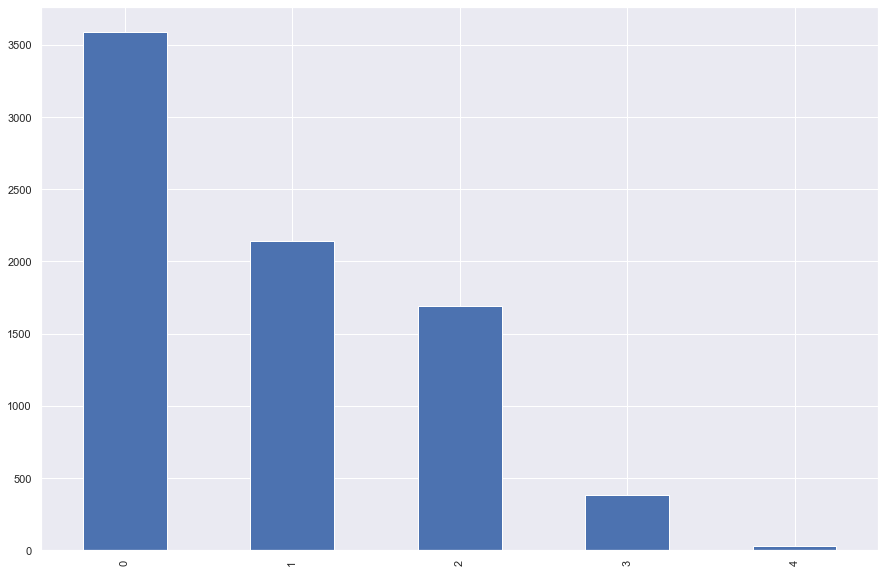

In [42]:
##outliers--Tratamiento
q1 = train_2['Age'].quantile(0.25)
q3 = train_2['Age'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_age']=np.where((train_2['Age'] >ls)|(train_2['Age'] < li),1,0)
  
#outliers
q1 = train_2['RoomService'].quantile(0.25)
q3 = train_2['RoomService'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_RoomService']=np.where((train_2['RoomService'] >ls)|(train_2['RoomService'] < li),1,0)
train_2  

q1 = train_2['FoodCourt'].quantile(0.25)
q3 = train_2['FoodCourt'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_FoodCourt']=np.where((train_2['FoodCourt'] >ls)|(train_2['FoodCourt'] < li),1,0)
train_2  

q1 = train_2['ShoppingMall'].quantile(0.25)
q3 = train_2['ShoppingMall'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_ShoppingMall']=np.where((train_2['ShoppingMall'] >ls)|(train_2['ShoppingMall'] < li),1,0)
train_2 

q1 = train_2['Spa'].quantile(0.25)
q3 = train_2['Spa'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_Spa']=np.where((train_2['Spa'] >ls)|(train_2['Spa'] < li),1,0)


q1 = train_2['VRDeck'].quantile(0.25)
q3 = train_2['VRDeck'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
train_2['out_VRDeck']=np.where((train_2['VRDeck'] >ls)|(train_2['VRDeck'] < li),1,0)
train_2 

####
train_2['cant_var_outl']= train_2['out_age']+train_2['out_RoomService']+train_2['out_FoodCourt']+train_2['out_ShoppingMall']+train_2['out_VRDeck']
##Cantidad de outliers por observación
train_2['cant_var_outl'].value_counts()[:10].plot(kind='bar')
train_2['cant_var_outl'].value_counts()
###

In [43]:
# Se quitan aquellos registros donde se observa que para 4 variables bajo análisis tienen outliers
train_2_ =train_2[train_2['cant_var_outl']<4]
                                  
len(train_2_)

7797

In [44]:
train_2.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_0', 'CryoSleep_1', 'Destination_0', 'Destination_1',
       'Destination_2', 'VIP_0', 'VIP_1', 'out_age', 'out_RoomService',
       'out_FoodCourt', 'out_ShoppingMall', 'out_Spa', 'out_VRDeck',
       'cant_var_outl'],
      dtype='object')

In [45]:
train_2_=train_2_.drop(['out_age', 'out_RoomService', 'out_FoodCourt',
       'out_ShoppingMall', 'out_Spa', 'out_VRDeck', 'cant_var_outl'],axis=1)
train_2_.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_0', 'CryoSleep_1', 'Destination_0', 'Destination_1',
       'Destination_2', 'VIP_0', 'VIP_1'],
      dtype='object')

In [46]:
part_90 = train_2_.sample(frac = 0.9)
rest_part_10 = train_2_.drop(part_90.index)

print(part_90)
print(rest_part_10)

train_2_ =part_90
valid_data=rest_part_10

           Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
6985  0.556962     0.210093   0.000872      0.000000  0.002767  0.037459   
6433  0.164557     0.000070   0.007111      0.035885  0.003481  0.000414   
3511  0.164557     0.000000   0.000000      0.000000  0.000000  0.000000   
5151  0.291139     0.000000   0.040385      0.001703  0.000000  0.015539   
7219  0.607595     0.000000   0.000000      0.000000  0.000000  0.000000   
...        ...          ...        ...           ...       ...       ...   
2765  0.101266     0.000000   0.000000      0.000000  0.000000  0.000000   
7618  0.430380     0.000000   0.020729      0.000000  0.000000  0.451166   
4836  0.544304     0.000140   0.178748      0.000000  0.000312  0.000000   
5731  0.291139     0.000000   0.036528      0.013239  0.000000  0.000000   
6644  0.392405     0.000000   0.031094      0.000000  0.123170  0.000041   

      Transported  HomePlanet_0  HomePlanet_1  HomePlanet_2  CryoSleep_0  \
6985       

In [47]:
y = train_2_.Transported 
X = train_2_.drop(['Transported'],axis=1)
X.columns
#y

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1'],
      dtype='object')

In [48]:
print(numerical_columns)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [49]:
train_2_.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1
count,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.00000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,0.364511,0.015385,0.014333,0.007123,0.013032,0.012072,0.507909,0.55223,0.245262,0.202508,0.644862,0.355138,0.205643,0.093345,0.701012,0.977341,0.022659
std,0.181498,0.045706,0.050127,0.025056,0.047954,0.044319,0.499973,0.49730,0.430273,0.401898,0.478589,0.478589,0.404200,0.290936,0.457847,0.148825,0.148825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.468354,0.003141,0.002080,0.001107,0.002588,0.001740,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.899943,1.000000,1.000000,0.842664,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =8)

In [51]:
x_train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1'],
      dtype='object')

In [52]:
x_test.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1'],
      dtype='object')

In [53]:
y_train

2740    1.0
1333    0.0
3119    0.0
6659    1.0
7081    1.0
       ... 
5672    0.0
3599    0.0
2653    1.0
2759    0.0
3741    0.0
Name: Transported, Length: 5613, dtype: float64

In [54]:
y_test

4048    0.0
3456    1.0
4920    1.0
989     1.0
70      0.0
       ... 
7330    0.0
6407    1.0
1763    1.0
3523    0.0
2143    1.0
Name: Transported, Length: 1404, dtype: float64

In [55]:
###Preparacion para PCA
# Separating out the features
features=train_2_[['Age','CryoSleep_1', 'VIP_1', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
xx = features
# Separating out the target
yy = train_2_['Transported']

####Aplicacion PCA
#####################################
from sklearn.decomposition import PCA
pca = PCA(min(10, xx.shape[1]))
principalComponents=pca.fit(xx)
print("Principal components")
print(pca.components_)

Principal components
[[-0.03125724  0.99805024 -0.03039588 -0.02403737 -0.02261074 -0.01096365
  -0.02057359 -0.01903378]
 [ 0.97799567  0.03893936  0.19691944  0.01259722  0.03845913  0.00184847
   0.0307202   0.02541631]
 [-0.20006881  0.02499582  0.97867298  0.00960731  0.0217417  -0.00111871
   0.00812496  0.03024237]
 [-0.04340123  0.02394789 -0.03783159 -0.28759146  0.69848967 -0.04341742
   0.54283145  0.35911541]
 [-0.02339713  0.02890709 -0.01956415  0.92651452  0.32807555 -0.01729391
   0.13786235 -0.11343   ]
 [-0.00188351  0.00103223  0.01281938  0.00848366 -0.47538819  0.01835066
   0.82316297 -0.30956603]
 [-0.00793179  0.01362837 -0.02270054  0.24067697 -0.41768583 -0.01193562
   0.08463532  0.87151798]
 [-0.00473002  0.01259923 -0.0020924   0.0059858   0.03949912  0.99860491
   0.01160003  0.02953244]]


In [56]:
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Explained variance ratio
[0.782871   0.11339729 0.07338694 0.00992657 0.00639355 0.00634729
 0.00565174 0.00202562]


In [57]:
pd.DataFrame(
    data    = pca.components_,
    columns = features.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8']
)

,Age,CryoSleep_1,VIP_1,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PC1,-0.031257,0.998050,-0.030396,-0.024037,-0.022611,-0.010964,-0.020574,-0.019034
PC2,0.977996,0.038939,0.196919,0.012597,0.038459,0.001848,0.030720,0.025416
PC3,-0.200069,0.024996,0.978673,0.009607,0.021742,-0.001119,0.008125,0.030242
PC4,-0.043401,0.023948,-0.037832,-0.287591,0.698490,-0.043417,0.542831,0.359115
PC5,-0.023397,0.028907,-0.019564,0.926515,0.328076,-0.017294,0.137862,-0.113430
PC6,-0.001884,0.001032,0.012819,0.008484,-0.475388,0.018351,0.823163,-0.309566
PC7,-0.007932,0.013628,-0.022701,0.240677,-0.417686,-0.011936,0.084635,0.871518
PC8,-0.004730,0.012599,-0.002092,0.005986,0.039499,0.998605,0.011600,0.029532


In [58]:
train_2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017 entries, 6985 to 6644
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7017 non-null   float64
 1   RoomService    7017 non-null   float64
 2   FoodCourt      7017 non-null   float64
 3   ShoppingMall   7017 non-null   float64
 4   Spa            7017 non-null   float64
 5   VRDeck         7017 non-null   float64
 6   Transported    7017 non-null   float64
 7   HomePlanet_0   7017 non-null   float64
 8   HomePlanet_1   7017 non-null   float64
 9   HomePlanet_2   7017 non-null   float64
 10  CryoSleep_0    7017 non-null   float64
 11  CryoSleep_1    7017 non-null   float64
 12  Destination_0  7017 non-null   float64
 13  Destination_1  7017 non-null   float64
 14  Destination_2  7017 non-null   float64
 15  VIP_0          7017 non-null   float64
 16  VIP_1          7017 non-null   float64
dtypes: float64(17)
memory usage: 986.8 KB


In [59]:
print(x_test)

           Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
4048  0.481013     0.000000   0.005769      0.000000  0.263611  0.001409   
3456  0.164557     0.000558   0.046456      0.061510  0.011157  0.000331   
4920  0.683544     0.000000   0.000000      0.000000  0.000000  0.000000   
989   0.518987     0.000000   0.000000      0.000000  0.000000  0.000000   
70    0.607595     0.000000   0.000403      0.000000  0.355543  0.000622   
...        ...          ...        ...           ...       ...       ...   
7330  0.278481     0.017101   0.000000      0.000000  0.029498  0.000041   
6407  0.367089     0.000000   0.112166      0.000000  0.005266  0.040277   
1763  0.620253     0.000000   0.260356      0.000085  0.000000  0.004061   
3523  0.405063     0.036784   0.062490      0.000000  0.018609  0.120375   
2143  0.202532     0.021149   0.002348      0.006428  0.025214  0.000083   

      HomePlanet_0  HomePlanet_1  HomePlanet_2  CryoSleep_0  CryoSleep_1  \
4048       

In [60]:
from pathlib import Path  
#filepath = Path(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\train_df_x.csv')
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\train_df_x.csv') 
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\train_df_x.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)  
x_train.to_csv(filepath)

In [61]:
from pathlib import Path  
#filepath = Path(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\train_df_y.csv')
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\train_df_y.csv') 
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\train_df_y.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_csv(filepath)

In [62]:
from pathlib import Path  
#filepath = Path(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\test_df_y.csv')
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\test_df_y.csv') 
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_df_y.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)  

y_test.to_csv(filepath)

In [63]:
from pathlib import Path  
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\test_df_x.csv') 
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_df_x.csv')

#filepath.parent.mkdir(parents=True, exist_ok=True)  
x_test.to_csv(filepath)

In [64]:
#x_test=pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\test_df_x.csv',index_col=0)
x_test=pd.read_csv(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_df_x.csv',index_col=0)

In [65]:
#y_test=pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\test_df_y.csv',index_col=0)
y_test=pd.read_csv(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_df_y.csv',index_col=0)


In [67]:
#x_train=pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\train_df_x.csv',index_col=0)
x_train=pd.read_csv(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\train_df_x.csv',index_col=0)


In [68]:
#y_train=pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\train_df_y.csv',index_col=0)
y_train=pd.read_csv(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\train_df_y.csv',index_col=0)


#### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [69]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))
    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.68%
Accuracy test {name}: 72.72%


In [70]:
y_val = valid_data['Transported'] 
x_val = valid_data.drop(['Transported'],axis=1)
###
#print(x_val)
#print(y_val)
len(x_val)
x_val.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1'],
      dtype='object')

In [71]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 24 to 7816
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            780 non-null    float64
 1   RoomService    780 non-null    float64
 2   FoodCourt      780 non-null    float64
 3   ShoppingMall   780 non-null    float64
 4   Spa            780 non-null    float64
 5   VRDeck         780 non-null    float64
 6   HomePlanet_0   780 non-null    float64
 7   HomePlanet_1   780 non-null    float64
 8   HomePlanet_2   780 non-null    float64
 9   CryoSleep_0    780 non-null    float64
 10  CryoSleep_1    780 non-null    float64
 11  Destination_0  780 non-null    float64
 12  Destination_1  780 non-null    float64
 13  Destination_2  780 non-null    float64
 14  VIP_0          780 non-null    float64
 15  VIP_1          780 non-null    float64
dtypes: float64(16)
memory usage: 103.6 KB


In [72]:
val_predictions = clf.predict(x_val)
val_predictions
accuracy = accuracy_score(y_val, val_predictions)
accuracy*100

73.46153846153847

In [73]:
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73       388
         1.0       0.73      0.76      0.74       392

    accuracy                           0.73       780
   macro avg       0.73      0.73      0.73       780
weighted avg       0.73      0.73      0.73       780



### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

In [74]:
###Análisis de métodos alternativos

!pip install xgboost
import xgboost
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

You should consider upgrading via the 'C:\Users\Varios\anaconda3\python.exe -m pip install --upgrade pip' command.


In [75]:
clfs =  [DecisionTreeClassifier(),
         
        RandomForestClassifier(),
         
        LogisticRegression(),
         
        MLPClassifier(),
         
  
         XGBClassifier(),
         
        GaussianNB(),
         
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    
    ######################################################
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))
    
    ###############################################################
    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)
    #clf.score(x_test, y_test)
    #############################################################    
    val_predictions = clf.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Accuracy val {name}: %.2f%%" % (val_accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(val_accuracy)   
    #clf.score(x_val, y_val)
##################################   

Arbol de decisión
Accuracy train Arbol de decisión: 93.68%
Accuracy test Arbol de decisión: 72.29%
Accuracy val Arbol de decisión: 73.21%
Random Forest


C:\Users\Varios\AppData\Local\Temp\ipykernel_15452\3914128649.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy train Random Forest: 93.68%
Accuracy test Random Forest: 78.92%
Accuracy val Random Forest: 77.95%
Regresión Logística
Accuracy train Regresión Logística: 77.00%
Accuracy test Regresión Logística: 74.22%
Accuracy val Regresión Logística: 74.62%
Perceptrón multicapa


C:\Users\Varios\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varios\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Varios\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Accuracy train Perceptrón multicapa: 80.31%
Accuracy test Perceptrón multicapa: 78.49%
Accuracy val Perceptrón multicapa: 77.69%
XGBoost
Accuracy train XGBoost: 90.54%
Accuracy test XGBoost: 78.42%
Accuracy val XGBoost: 77.44%
Naive Bayes
Accuracy train Naive Bayes: 73.88%
Accuracy test Naive Bayes: 73.50%
Accuracy val Naive Bayes: 71.15%
SVM
Accuracy train SVM: 78.82%
Accuracy test SVM: 76.57%
Accuracy val SVM: 75.51%


C:\Users\Varios\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varios\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###SE PRUEBAN DIFERENTES PARAMETROS PARA XBG BOOST, MULTIPERCEPTON Y RANDOM FOREST

In [76]:
############################################
###XGB con cross_validate y GridSearchCV
###############################################
#x_train[['HomePlanet_1', 'HomePlanet_2', 'HomePlanet_0',
 #      'Destination_1',
  #     'Destination_2', 'Destination_0']].astype("category")

#########
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
##################
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score
from xgboost import XGBClassifier
reg=XGBClassifier()
###############
params={"n_estimators":[40,50,60,70,100,120],'reg_lambda':[3,2,1],'gamma':[0.4,0.3,0.2,0.1]
       ,'eta':[0.5,0.4,0.3,0.2,0.1]
        ,"max_depth":[3,8],'objective':['rank:pairwise','binary:logistic','reg:logistic'],'eval_metric':['rmse','auc']}
################################
clf=GridSearchCV(reg,params,cv=3,n_jobs=-1,verbose=1)
clf.fit(x_train,y_train)
##############################
y_pred=clf.predict(x_train)
t_pred=clf.predict(x_test)
v_pred= clf.predict(x_val)
print(accuracy_score(y_pred,y_train))
print(accuracy_score(t_pred,y_test))
print(accuracy_score(v_pred,y_val))
#####################################

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits
0.8556921432389096
0.7884615384615384
0.7923076923076923


              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      2777
         1.0       0.84      0.88      0.86      2836

    accuracy                           0.86      5613
   macro avg       0.86      0.86      0.86      5613
weighted avg       0.86      0.86      0.86      5613

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       676
         1.0       0.79      0.81      0.80       728

    accuracy                           0.79      1404
   macro avg       0.79      0.79      0.79      1404
weighted avg       0.79      0.79      0.79      1404

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       388
         1.0       0.79      0.80      0.79       392

    accuracy                           0.79       780
   macro avg       0.79      0.79      0.79       780
weighted avg       0.79      0.79      0.79       780

XGBClassifier(base_

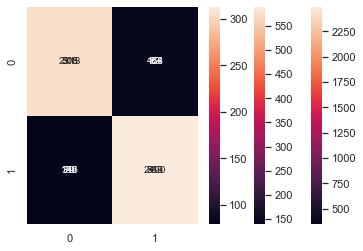

In [77]:

##https://www.kaggle.com/code/raafaq/xgbclassifier
###https://xgboost-clone.readthedocs.io/en/latest/parameter.html#learning-task-parameters

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g')
print(classification_report(y_train, y_pred))

sns.heatmap(confusion_matrix(y_test, t_pred), annot=True, fmt='g')
print(classification_report(y_test, t_pred))

sns.heatmap(confusion_matrix(y_val, v_pred), annot=True, fmt='g')
print(classification_report(y_val, v_pred))

print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)

###############
# - cross validataion
#scores = cross_val_score(clf, x_train, y_train, cv=5)
#print("Mean cross-validation score: %.2f" % scores.mean())
################
#kfold = KFold(n_splits=10, shuffle=True)
#kf_cv_scores = cross_val_score(clf, x_train, y_train, cv=kfold )
#print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [79]:
###############################
### con multipercepton
###############################

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score
from xgboost import XGBClassifier
#####################
mlp_cf=MLPClassifier()
###################
param_grid = {
    'hidden_layer_sizes': [(150,100), (120,80), (100,500)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.005, 0.05,0.001],
    'learning_rate': ['constant','adaptive']}
################
mlp = GridSearchCV(mlp_cf, param_grid, n_jobs= -1, cv=5)
mlp.fit(x_train, y_train)
#################
print(mlp.best_params_) 
print(mlp.best_estimator_)
print(mlp.best_score_)

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
MLPClassifier(alpha=0.005, hidden_layer_sizes=(150, 100),
              learning_rate='adaptive', max_iter=100)
0.8034882373576


0.8033137359700695
0.7870370370370371
0.7833333333333333
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      2777
         1.0       0.77      0.87      0.82      2836

    accuracy                           0.80      5613
   macro avg       0.81      0.80      0.80      5613
weighted avg       0.81      0.80      0.80      5613



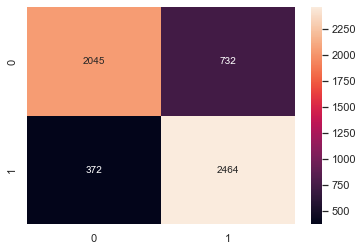

In [80]:
##############################
y_pred=mlp.predict(x_train)
t_pred=mlp.predict(x_test)
v_pred= mlp.predict(x_val)
print(accuracy_score(y_pred,y_train))
print(accuracy_score(t_pred,y_test))
print(accuracy_score(v_pred,y_val))
#####################################
##train
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g')
print(classification_report(y_train, y_pred))
###############################

In [81]:
#####Random Forest######################
#######################################
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#-max_features represents the number of features to consider when looking for the best split.
#-min_samples_leaf is The minimum number of samples required to be at a leaf node. 
#This parameter is similar to min_samples_splits, however, 
#this describe the minimum number of samples of samples at the leafs, the base of the tree.
#-min_samples_split represents the minimum number of samples required to split an internal node. 
#This can vary between considering at least one sample at each node to considering all 
#of the samples at each node. When we increase this parameter, each tree in the forest becomes 
#more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples
#-max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it 
#has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.
#-n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

##############################

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\Varios\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=1000)
0.4356042974875231
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1000}


In [83]:
train_predictions=grid_search.predict(x_train)
train_predictions=pd.DataFrame(train_predictions, index=x_train.index)
train_predictions=train_predictions.rename(columns={0:'Transported'})
train_predictions=train_predictions.Transported.round()

accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train: %.2f%%" % (accuracy * 100.0))

##########################################
test_predictions = grid_search.predict(x_test)
test_predictions=pd.DataFrame(test_predictions, index=x_test.index)
test_predictions=test_predictions.rename(columns={0:'Transported'})
test_predictions=test_predictions.Transported.round()
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
##############################################

val_predictions = grid_search.predict(x_val)
val_predictions=pd.DataFrame(val_predictions, index=x_val.index)
val_predictions=val_predictions.rename(columns={0:'Transported'})
val_predictions=val_predictions.Transported.round()
accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy val: %.2f%%" % (accuracy * 100.0))

Accuracy train: 85.62%
Accuracy test: 79.20%
Accuracy val: 77.44%


In [84]:
#####################################

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      2777
         1.0       0.77      0.87      0.82      2836

    accuracy                           0.80      5613
   macro avg       0.81      0.80      0.80      5613
weighted avg       0.81      0.80      0.80      5613

Accuracy train: 85.62%
Accuracy test: 79.20%
Accuracy test: 77.44%


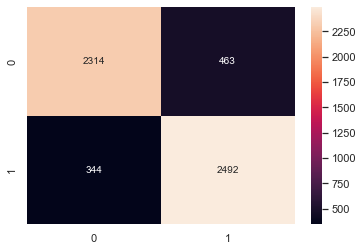

In [86]:
##train
sns.heatmap(confusion_matrix(y_train, train_predictions), annot=True, fmt='g')
print(classification_report(y_train, y_pred))

accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train: %.2f%%" % (accuracy * 100.0))

accuracy2 = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy2 * 100.0))

accuracy3 = accuracy_score(y_val, val_predictions)
print("Accuracy test: %.2f%%" % (accuracy3 * 100.0))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
   roc_auc_train = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc_train)
  
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, t_pred)
   roc_auc_train = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc_pred)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, ‘b’, label=”Train AUC”)
line2, = plt.plot(n_estimators, test_results, ‘r’, label=”Test AUC”)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel(‘AUC score’)
plt.xlabel(‘n_estimators’)
plt.show()

## Generar la salida para entregar

test_df = pd.read_csv('test.csv')

test_df

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

In [203]:
###UNA VEZ ELEGIDO EL MODELO FINAL
### SE LEVANTA EL ARCHIVO "TEST CURADO" Y SE ARMA LA TABLA

##archivo que se predice a partir de xgbBoost
test_df=pd.read_csv(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_curado.csv')
#test_df=pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\test_curado.csv',index_col=0)
test_df
####

,Unnamed: 0,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1,PassengerId
0,0,0.459459,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,415
1,1,0.175676,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8663
2,2,0.594595,0.003736,0.000057,0.000000,0.057715,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4524
3,3,0.851351,0.000000,0.000000,0.008832,0.000000,0.134173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8246
4,4,0.135135,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,865,0.729730,0.114810,0.000000,0.025502,0.025317,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5996
865,866,0.783784,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5478
866,867,0.243243,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6760
867,868,0.243243,0.129925,0.000000,0.001435,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1437


In [204]:
test_df_id=test_df['PassengerId']
test_df_id
test_df.columns
test_df=test_df[['Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_0', 'HomePlanet_1',
       'HomePlanet_2', 'CryoSleep_0', 'CryoSleep_1', 'Destination_0',
       'Destination_1', 'Destination_2', 'VIP_0', 'VIP_1']]
test_df
test_df.shape

(869, 16)

In [205]:
test_pred_clf = clf.predict(test_df)
test_pred_clf

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [206]:
test_pred_clf=pd.DataFrame(test_pred_clf)
test_pred_clf=test_pred_clf.rename(columns={0:'Transported'})
#test_pred_clf=test_pred_clf.Transported.round()
test_pred_clf=pd.concat([test_df_id,test_pred_clf],axis=1)
test_pred_clf=test_pred_clf[['PassengerId','Transported']]

print(test_pred_clf)

     PassengerId  Transported
0            415            1
1           8663            1
2           4524            0
3           8246            0
4           2935            1
..           ...          ...
864         5996            0
865         5478            1
866         6760            1
867         1437            0
868         5171            0

[869 rows x 2 columns]


In [207]:
###Archivo que se predice a partir de mlp
test_pred_mlp = mlp.predict(test_df)
test_pred_mlp


array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [208]:
####
test_pred_mlp=pd.DataFrame(test_pred_mlp, index=test_df.index)
test_pred_mlp=test_pred_mlp.rename(columns={0:'Transported'})
#test_pred_mlp=test_pred_mlp.Transported.round()
test_pred_mlp=pd.concat([test_df_id,test_pred_mlp],axis=1)
print(test_pred_mlp)
test_pred_mlp=test_pred_mlp[['PassengerId','Transported']]


     PassengerId  Transported
0            415          1.0
1           8663          1.0
2           4524          0.0
3           8246          0.0
4           2935          1.0
..           ...          ...
864         5996          0.0
865         5478          1.0
866         6760          1.0
867         1437          0.0
868         5171          0.0

[869 rows x 2 columns]


In [209]:
##Archivo que se predice a partir  de random forest
test_pred_grid_search = grid_search.predict(test_df)
test_pred_grid_search

test_pred_grid_search=pd.DataFrame(test_pred_grid_search)
test_pred_grid_search=test_pred_grid_search.rename(columns={0:'Transported'})
test_pred_grid_search=test_pred_grid_search.Transported.round()
test_pred_grid_search=pd.concat([test_df_id,test_pred_grid_search],axis=1)
test_pred_grid_search=test_pred_grid_search[['PassengerId','Transported']]

print(test_pred_grid_search)

     PassengerId  Transported
0            415          1.0
1           8663          1.0
2           4524          0.0
3           8246          0.0
4           2935          1.0
..           ...          ...
864         5996          0.0
865         5478          1.0
866         6760          1.0
867         1437          0.0
868         5171          0.0

[869 rows x 2 columns]


In [210]:
###########################
from pathlib import Path

In [211]:
 filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\sample_submission_xgboost.csv')
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\sample_submission_xgboost.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_pred_clf.to_csv(filepath)

In [212]:
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\sample_submission_mlp.csv')
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\sample_submission_mlp.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_pred_mlp.to_csv(filepath)

In [213]:
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\sample_submission_randomforest.csv')#
#filepath = Path(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\TP\sample_submission_randomforest.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_pred_grid_search.to_csv(filepath)